In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('04_22.csv')
df[0:5]

,Unnamed: 0,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,FTR
0,30,1.199006,-0.325458,1.672309,0.092964,0.072379,0.371667,0.741030,3.063633,-0.719519,-0.001163,-0.030735,-3.109829,1.543916,3.950040,-0.934438,H
1,31,0.459169,0.850221,-1.134070,0.545853,0.878015,-1.007148,-2.061876,0.253267,-0.719519,1.293817,-0.674108,2.663004,-0.768541,0.295855,-0.934438,H
2,32,-2.130261,-1.501137,-0.733159,-1.175124,-2.183401,-0.087938,-0.248231,-1.932574,1.150657,-1.296144,1.256011,-0.030984,0.773097,-2.546289,1.511995,H
3,33,1.199006,1.634007,0.068664,-0.178769,-0.411002,0.831272,0.741030,-0.058996,-1.966302,1.941308,-1.317481,2.278149,1.543916,-0.110165,-2.565393,H
4,34,-1.760342,-1.893029,-0.332247,-0.903391,-2.022274,-2.477883,-2.721384,-1.308048,3.020833,-0.001163,5.116251,0.738727,0.002278,-1.734247,3.958427,A


In [3]:
# lay index de chia train_test
split_train = 5950

In [4]:
features = ['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC', 'pastASTC-HSTC', 
              'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint', 'FTR']
data = df[features]
data[20:25]

,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,FTR
20,-0.280668,0.458328,0.469575,0.183542,-0.249875,0.831272,1.400537,-1.058238,0.028552,-1.425642,-0.288084,-0.800696,1.081425,-1.409431,0.044135,D
21,-1.760342,-2.284922,0.068664,-2.080901,-2.344528,-0.547543,-0.907739,-1.807669,0.683113,-1.037148,1.738541,1.970264,0.965802,-2.383880,0.900387,H
22,-1.020505,-0.717351,-1.534981,-1.446857,-1.377765,-2.477883,-2.226753,-2.182384,-1.093554,-1.037148,-0.288084,1.970264,-0.768541,-2.871105,-1.423724,A
23,-1.020505,-1.109244,-0.733159,-1.265702,-1.700019,-0.179859,-0.248231,-1.432953,0.402587,-0.648654,0.097940,1.046611,-0.306049,-1.896656,0.533422,D
24,0.089250,-0.717351,0.870487,-0.450502,-0.572129,0.187825,0.246399,-1.432953,-1.093554,-1.037148,-0.288084,0.584784,1.543916,-1.896656,-1.423724,D


In [5]:
X = data.drop(['FTR'], axis=1)
Y = data['FTR']

In [6]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(Y)

[2 2 2 ... 2 2 0]


In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
# print(y_train.shape, y_test.shape)
X_train, X_test = X[:split_train], X[split_train: ]
y_train, y_test = Y[:split_train], Y[split_train: ]
y_test

array([2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2,
       1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1,
       2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0,
       0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1,

In [8]:
class Ann:
    def __init__(self, X_train, y_train) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.his = None
    
    def build_model(self, activations,  kernel_initializer = keras.initializers.GlorotUniform(), 
        bias_initializer = keras.initializers.ones() ):
        self.model = None
        # activations (string): tên các activation function tương ứng với từng dense (ngoại trừ input output) 
        # output layer: mặc định activation = 'softmax'
        # mỗi layer sẽ có 128 node (trừ input và output layer)
        dense = []
        dense.append(keras.Input(X_train.shape[1]))

        #append middle layer
        for s in activations:
            last_dense = dense[-1]
            if s == 'BatchNormalization':
                dense.append(keras.layers.BatchNormalization()(last_dense))
            else:
                dense.append(keras.layers.Dense(128, activation=s, kernel_initializer = kernel_initializer, 
                        bias_initializer=bias_initializer)(last_dense))

        #append output
        last_dense = dense[-1]
        dense.append(keras.layers.Dense(3, activation='softmax', kernel_initializer = kernel_initializer, 
                    bias_initializer = bias_initializer)(last_dense))

        self.model = keras.Model(inputs = dense[0], outputs = dense[-1])

    def compile_model(self, lr = 1e-5):
        self.model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),  
        optimizer = keras.optimizers.Adam(learning_rate = lr),
        metrics = ['accuracy']
        )
    
    def fit(self, batch_size=32, verbose=2, epochs = 500, validation_split=0.25):
        self.his=self.model.fit(X_train, y_train, batch_size=batch_size, verbose=verbose, epochs = epochs, validation_split=validation_split, use_multiprocessing=True)

    def plot(self):
        his = self.his
        f, (ax1, ax2) = plt.subplots(1, 2)
        ax1.plot(his.history['accuracy'], label='test_acc')
        ax1.plot(his.history['val_loss'], label='val_acc')
        ax1.legend()
        
        ax2.plot(his.history['loss'], label='test_loss')
        ax2.plot(his.history['val_loss'], label='val_loss')
        ax2.legend()
    
    def evaluate(self, X_test, y_test):
        self.model.evaluate(X_test, y_test, verbose=2)

    @property
    def history(self):
        return self.his

In [9]:
def test_learning_rate(): # kiểm tra giá trị loss trên tập val với lr = 1e-3, 1e-4, 1e-5
    ann1 = Ann(X_train, y_train)
    ann2 = Ann(X_train, y_train)
    ann3 = Ann(X_train, y_train)

    ann1.build_model(['tanh', 'relu'])
    ann2.build_model(['tanh', 'relu'])
    ann3.build_model(['tanh', 'relu'])

    ann1.compile_model(lr = 1e-3)
    ann2.compile_model(lr = 1e-4)
    ann3.compile_model(lr = 1e-5)

    ann1.fit(batch_size=512, epochs=1000, verbose=0)
    ann2.fit(batch_size=512, epochs=1000, verbose=0)
    ann3.fit(batch_size=512, epochs=1000, verbose=0)
    #subplot1
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,7))
    ax1.set_title('Test learning rate')
    ax1.margins(y = 0.1)
    ax1.set(xlabel='epoch', ylabel='val loss')
    ax1.plot(ann1.history.history['val_loss'], label='lr = 1e-3', color='skyblue')
    ax1.plot(ann2.history.history['val_loss'], label='lr = 1e-4', color="magenta")
    ax1.plot(ann3.history.history['val_loss'], label='lr = 1e-5', color="green")
    ax1.legend()
    #subplot2
    ax2.set(xlabel='epoch', ylabel='val loss')
    ax2.margins(y = 0.5)
    ax2.plot(ann1.history.history['val_accuracy'], label='lr = 1e-3', color='skyblue')
    ax2.plot(ann2.history.history['val_accuracy'], label='lr = 1e-4', color="magenta")
    ax2.plot(ann3.history.history['val_accuracy'], label='lr = 1e-5', color="green")
    ax2.legend()


In [10]:
def test_init_weight():
    ann1 = Ann(X_train, y_train)
    ann2 = Ann(X_train, y_train)
    ann3 = Ann(X_train, y_train)
    ann4 = Ann(X_train, y_train)
    ann5 = Ann(X_train, y_train)
    ann6 = Ann(X_train, y_train)
    ann7 = Ann(X_train, y_train)
    ann8 = Ann(X_train, y_train)
    ann9 = Ann(X_train, y_train)

    ann1.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.GlorotUniform(1), bias_initializer = keras.initializers.GlorotUniform(4))
    ann2.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.GlorotUniform(2), bias_initializer = keras.initializers.ones())
    ann3.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.GlorotUniform(3), bias_initializer = keras.initializers.zeros())

    ann4.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.ones(), bias_initializer = keras.initializers.GlorotUniform(5))
    ann5.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.ones(), bias_initializer = keras.initializers.ones())
    ann6.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.ones(), bias_initializer = keras.initializers.zeros())

    ann7.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.zeros(), bias_initializer = keras.initializers.GlorotUniform(6))
    ann8.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.zeros(), bias_initializer = keras.initializers.ones())
    ann9.build_model(['relu', 'relu'], kernel_initializer = keras.initializers.zeros(), bias_initializer = keras.initializers.zeros())

    ann1.compile_model(lr = 1e-5)
    ann2.compile_model(lr = 1e-5)
    ann3.compile_model(lr = 1e-5)
    ann4.compile_model(lr = 1e-5)
    ann5.compile_model(lr = 1e-5)
    ann6.compile_model(lr = 1e-5)
    ann7.compile_model(lr = 1e-5)
    ann8.compile_model(lr = 1e-5)
    ann9.compile_model(lr = 1e-5)

    ann1.fit(batch_size=512, epochs=250, verbose=0)
    ann2.fit(batch_size=512, epochs=250, verbose=0)
    ann3.fit(batch_size=512, epochs=250, verbose=0)
    ann4.fit(batch_size=512, epochs=250, verbose=0)
    ann5.fit(batch_size=512, epochs=250, verbose=0)
    ann6.fit(batch_size=512, epochs=250, verbose=0)
    ann7.fit(batch_size=512, epochs=250, verbose=0)
    ann8.fit(batch_size=512, epochs=250, verbose=0)
    ann9.fit(batch_size=512, epochs=250, verbose=0)

    f, axs = plt.subplots(3, 3, figsize=(10,10))

    axs[0, 0].set_title('weights = GlorotUniform \n biases = GlorotUniform')
    axs[0, 0].plot(ann1.history.history['loss'], label='test_loss')
    axs[0, 0].plot(ann1.history.history['val_loss'], label='val_loss')

    axs[0, 1].set_title('weights = GlorotUniform \n biases = ones')
    axs[0, 1].plot(ann2.history.history['loss'], label='test_loss')
    axs[0, 1].plot(ann2.history.history['val_loss'], label='val_loss')

    axs[0, 2].set_title('weights = GlorotUniform \n biases = zeros')
    axs[0, 2].plot(ann3.history.history['loss'], label='test_loss')
    axs[0, 2].plot(ann3.history.history['val_loss'], label='val_loss')

    axs[1, 0].set_title('weights = ones \n biases = GlorotUniform')
    axs[1, 0].plot(ann4.history.history['loss'], label='test_loss')
    axs[1, 0].plot(ann4.history.history['val_loss'], label='val_loss')

    axs[1, 1].set_title('weights = ones \n biases = ones')
    axs[1, 1].plot(ann5.history.history['loss'], label='test_loss')
    axs[1, 1].plot(ann5.history.history['val_loss'], label='val_loss')

    axs[1, 2].set_title('weights = ones \n biases = zeros')
    axs[1, 2].plot(ann6.history.history['loss'], label='test_loss')
    axs[1, 2].plot(ann6.history.history['val_loss'], label='val_loss')

    axs[2, 0].set_title('weights = zeros \n biases = GlorotUniform')
    axs[2, 0].plot(ann7.history.history['loss'], label='test_loss')
    axs[2, 0].plot(ann7.history.history['val_loss'], label='val_loss')

    axs[2, 1].set_title('weights = zeros \n biases = ones')
    axs[2, 1].plot(ann8.history.history['loss'], label='test_loss')
    axs[2, 1].plot(ann8.history.history['val_loss'], label='val_loss')

    axs[2, 2].set_title('weights = zeros \n biases = zeros')
    axs[2, 2].plot(ann9.history.history['loss'], label='test_loss')
    axs[2, 2].plot(ann9.history.history['val_loss'], label='val_loss')

    handles, labels = axs[0, 0].get_legend_handles_labels()
    plt.setp(axs[-1, :], xlabel='epochs')
    plt.setp(axs[:, 0], ylabel='loss')
    f.legend(handles, labels, loc = "upper left")
    f.tight_layout(pad=3.0)

In [11]:
def test_activation(lr = 1e-5):
    ann0 = Ann(X_train, y_train)
    ann1 = Ann(X_train, y_train)
    ann2 = Ann(X_train, y_train)

    ann0.build_model(['sigmoid', 'sigmoid'])
    ann1.build_model(['relu', 'relu'])
    ann2.build_model(['tanh', 'tanh'])

    ann0.compile_model(lr = lr)
    ann1.compile_model(lr = lr)
    ann2.compile_model(lr = lr)

    ann0.fit(batch_size=512, epochs=500, verbose=0)
    ann1.fit(batch_size=512, epochs=500, verbose=0)
    ann2.fit(batch_size=512, epochs=500, verbose=0)

    lables = ['sigmoid','relu', 'tanh']
    colors = ['skyblue', "magenta", 'green']
    #subplot1
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,9))
    ax1.set_title('Test activation function')
    ax1.margins(y = 0.5)
    val_loss = [
                ann0.history.history['val_loss'][-1], 
                ann1.history.history['val_loss'][-1],
                ann2.history.history['val_loss'][-1],
            ]
   
    ax1.set(ylabel='val loss')
    ax1.bar(lables, val_loss, color=colors)
    for x, y in enumerate(val_loss):
        ax1.text(x-0.1, y+0.02, f"{round(y, 3):.3f}", color = 'black')

    #subplot2
    ax2.set_title('Test activation function')
    ax2.margins(y = 0.5)
    val_accuracy = [
                ann0.history.history['val_accuracy'][-1],
                ann1.history.history['val_accuracy'][-1],
                ann2.history.history['val_accuracy'][-1],
            ]
    ax2.set(ylabel='val accuracy')
    ax2.bar(lables, val_accuracy, color=colors)
    for x, y in enumerate(val_accuracy):
        ax2.text(x-0.1, y+0.02, f"{round(y, 3):.3f}", color = 'black')


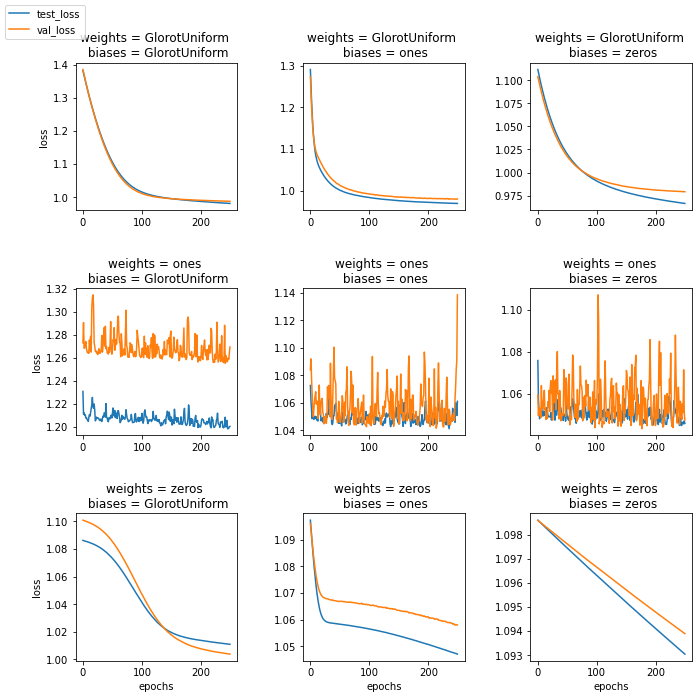

In [12]:
test_init_weight()

C:\Users\Admin\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


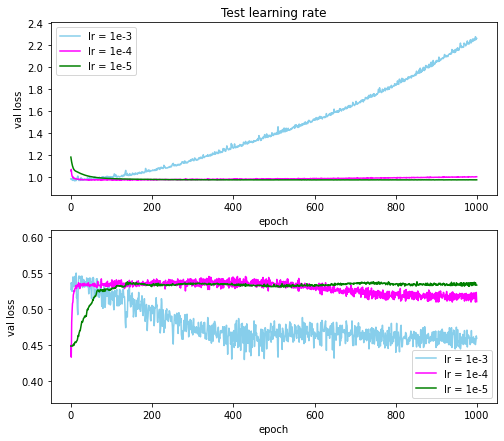

In [13]:
test_learning_rate()

C:\Users\Admin\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


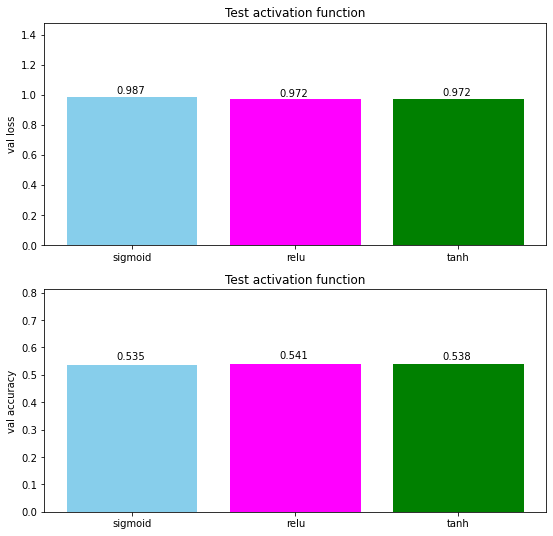

In [14]:
test_activation()

In [15]:
ann1 = Ann(X_train, y_train)
ann1.build_model(['relu','relu'])


C:\Users\Admin\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


lấy mô hình activation relu

In [16]:
ann1.compile_model()
ann1.fit(epochs=1000, batch_size=512, verbose=0)

11/11 - 0s - loss: 0.9905 - accuracy: 0.5200 - 83ms/epoch - 8ms/step


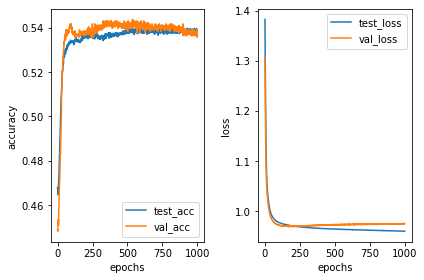

In [17]:
plt.subplot(1, 2, 1)
plt.plot(ann1.history.history['accuracy'], label='test_acc')
plt.plot(ann1.history.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann1.history.history['loss'], label='test_loss')
plt.plot(ann1.history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
# chạy test
ann1.evaluate(X_test, y_test)

In [18]:
ann1.model.save('model_ann_relu')

INFO:tensorflow:Assets written to: model_ann_relu\assets


Lấy mô hình activation tanh

In [19]:
ann2 = Ann(X_train, y_train)
ann2.build_model(['tanh','tanh'])

C:\Users\Admin\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [20]:
ann2.compile_model()
ann2.fit(epochs=1000, batch_size=512, verbose=0)

11/11 - 0s - loss: 0.9873 - accuracy: 0.5286 - 71ms/epoch - 6ms/step


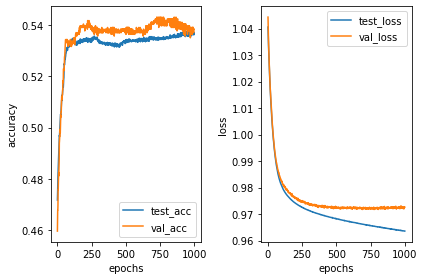

In [21]:
plt.subplot(1, 2, 1)
plt.plot(ann2.history.history['accuracy'], label='test_acc')
plt.plot(ann2.history.history['val_accuracy'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann2.history.history['loss'], label='test_loss')
plt.plot(ann2.history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
# chạy test
ann2.evaluate(X_test, y_test)

In [22]:
ann2.model.save('model_ann_tanh')

INFO:tensorflow:Assets written to: model_ann_tanh\assets
